# Movies

След дълго блеене из дълбините на kaggle, разглеждане на dataset-ове за покемони, DoTA и Path of Exile, в който си нямах и на идея какво да или как да трансформирам данните до нещо смислено, реших да пробвам да си поиграя със следния [dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata/data)

В края на този notebook се надявам да мога да предвиждам по-добре приходите на филмите от някоя лелка гледаща на кафе на продуцента.


## 1. Exploration and Cleaning


Нека разгледаме данните

In [75]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

%matplotlib inline

In [4]:
data = pd.read_csv("tmdb_5000_movies.csv")
print("Shape of the data {}".format(data.shape))

Shape of the data (4803, 20)


Нека разгледаме колоните които имаме:

In [5]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
pd.DataFrame([[column, type(data[column][0])] for column in data.columns], columns=['Name', 'Type'])

,Name,Type
0,budget,<class 'numpy.int64'>
1,genres,<class 'str'>
2,homepage,<class 'str'>
3,id,<class 'numpy.int64'>
4,keywords,<class 'str'>
5,original_language,<class 'str'>
6,original_title,<class 'str'>
7,overview,<class 'str'>
8,popularity,<class 'numpy.float64'>
9,production_companies,<class 'str'>


In [7]:
data_is_null = data.isnull()
column_length = data.shape[0]
column_data = [(column, sum(data_is_null[column]), (1 - sum(data_is_null[column] / column_length)) * 100) for column in data.columns]
pd.DataFrame(column_data, columns=['Column', 'Empty elements', 'Fillness'])

,Column,Empty elements,Fillness
0,budget,0,100.000000
1,genres,0,100.000000
2,homepage,3091,35.644389
3,id,0,100.000000
4,keywords,0,100.000000
5,original_language,0,100.000000
6,original_title,0,100.000000
7,overview,3,99.937539
8,popularity,0,100.000000
9,production_companies,0,100.000000


### Genres
Жанровете най-вероятно ще са важна колона. Нека си поиграем с тях.

In [8]:
genre_id_lists = [list(map(lambda hash: hash['id'], genre_list)) for genre_list in data['genres'].apply(json.loads)]

In [9]:
genres_dataframe = pd.DataFrame(genre_id_lists)
genres_dataframe

,0,1,2,3,4,5,6
0,28.0,12.0,14.0,878.0,NaN,NaN,NaN
1,12.0,14.0,28.0,NaN,NaN,NaN,NaN
2,28.0,12.0,80.0,NaN,NaN,NaN,NaN
3,28.0,80.0,18.0,53.0,NaN,NaN,NaN
4,28.0,12.0,878.0,NaN,NaN,NaN,NaN
5,14.0,28.0,12.0,NaN,NaN,NaN,NaN
6,16.0,10751.0,NaN,NaN,NaN,NaN,NaN
7,28.0,12.0,878.0,NaN,NaN,NaN,NaN
8,12.0,14.0,10751.0,NaN,NaN,NaN,NaN
9,28.0,12.0,14.0,NaN,NaN,NaN,NaN


In [10]:
flattened_genres = [item for ls in genre_id_lists for item in ls]

In [11]:
{element: flattened_genres.count(element) for element in flattened_genres}

{12: 790,
 14: 424,
 16: 234,
 18: 2297,
 27: 519,
 28: 1154,
 35: 1722,
 36: 197,
 37: 82,
 53: 1274,
 80: 696,
 99: 110,
 878: 535,
 9648: 348,
 10402: 185,
 10749: 894,
 10751: 513,
 10752: 144,
 10769: 34,
 10770: 8}

In [12]:
print(set(flattened_genres))

{10752, 10402, 35, 36, 37, 99, 12, 878, 14, 80, 16, 18, 9648, 10769, 53, 10770, 27, 28, 10749, 10751}


Смятах че жанровете ще са много повече ... Дали не съм объркал нещо. Ще взимам random елементи от dataset-a и ще проверявам дали жанровете им са част от това множество

In [13]:
data['genres'][42]

'[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}, {"id": 35, "name": "Comedy"}]'

Изглежда че не съм сгрешил, а че просто id-тата са странни. В такъв случай ще ги one-hot encode-на

In [14]:
from sklearn.preprocessing import OneHotEncoder
genres_enc = OneHotEncoder()
max_length = max(map(len, genre_id_lists))
filled_genres = [orig + ([0] * (max_length - len(orig))) for orig in genre_id_lists]
genre_matrix = genres_enc.fit_transform(filled_genres)
print("Number of unique IDs for column:", genres_enc.n_values_)
print(genre_matrix.shape)

Number of unique IDs for column: [10771 10770 10771 10771 10771 10753 10750]
(4803, 117)


Well, очаквах че ще стане друго, но ще пробвам със set-ове от id-та, за да пробвам да разкарам зависимостта от реда в който да дадени жанровете.

In [15]:
genre_sets_list = [set(lst) for lst in genre_id_lists]
print(genre_sets_list[1024])
genres_set_enc = OneHotEncoder()
genre_matrix = genres_set_enc.fit_transform(filled_genres)
print("Number of unique IDs for column:", genres_set_enc.n_values_)
print(genre_matrix.shape)

{53, 80, 35, 12, 28}
Number of unique IDs for column: [10771 10770 10771 10771 10771 10753 10750]
(4803, 117)


И това не помогна особено, но съм твърдоглав и продължавам да пробвам

In [16]:
sorted_genres = [list(reversed(sorted(element))) for element in filled_genres]

sorted_genres_enc = OneHotEncoder()
genre_matrix = sorted_genres_enc.fit_transform(sorted_genres)

print("Number of unique IDs for column:", genres_set_enc.n_values_)
print(genre_matrix.shape)

Number of unique IDs for column: [10771 10770 10771 10771 10771 10753 10750]
(4803, 84)


Така успяхме да намалим броя на комбинациите от жанрове. Но нека направим по-проста матрица чиито колони ще са жанровете.

In [17]:
genre_string_id_lists = [[str(elem) for elem in list_] for list_ in genre_id_lists]
genre_string_id_lists = [' '.join(elem) for elem in genre_string_id_lists]
genre_df = (pd.Series(genre_string_id_lists).str.get_dummies(' '))
genre_df

,10402,10749,10751,10752,10769,10770,12,14,16,18,27,28,35,36,37,53,80,878,9648,99
0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0


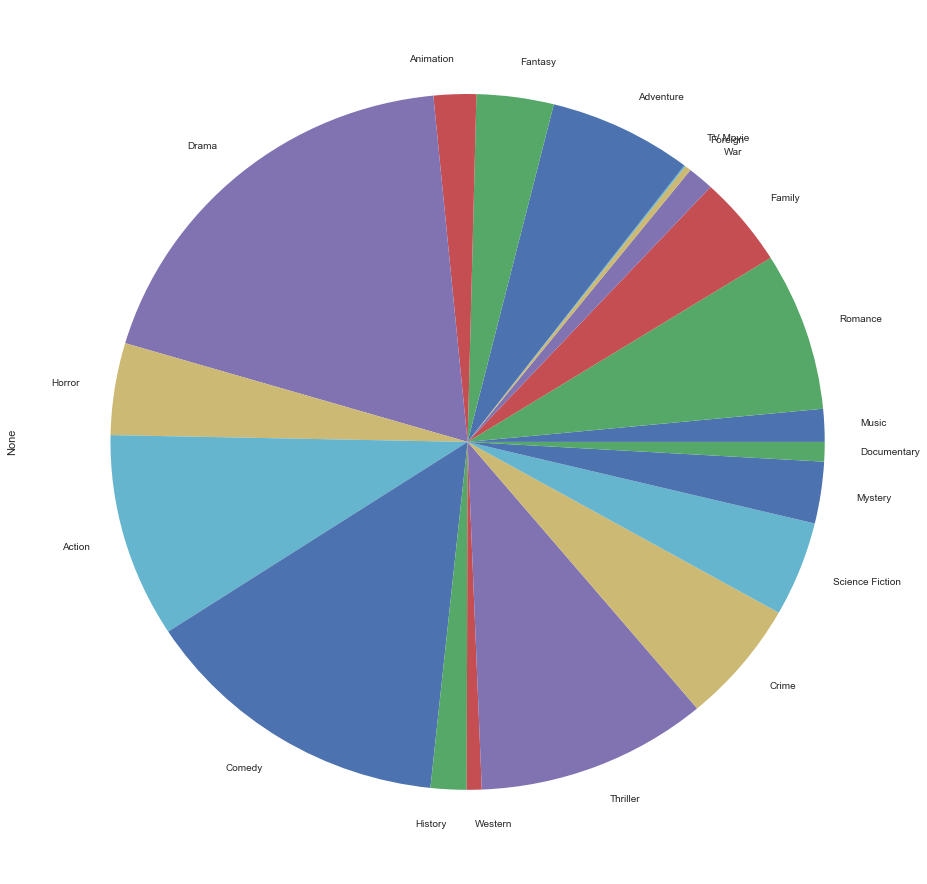

In [18]:
id_to_name_dict = { '{}'.format(elem['id']): elem['name'] for genre_list in data['genres'].apply(json.loads) for elem in genre_list}
genre_temp = genre_df.copy()
genre_temp.columns = [id_to_name_dict[elem] for elem in genre_temp.columns]
sns.set()
genre_temp.sum().plot.pie(figsize=(16, 16))
del(genre_temp)

### Homepage

По-рано видяхме, че имахме доста липсващи резултати в колоната 'homepage'. Така или иначе тя нама да ни трябва, но можем да направим колона за това дали филма има homepage

In [19]:
data['has_website'] = list(map(lambda x: (type(x) is str), data['homepage']))
data['has_website'] = data['has_website'].astype(int)

Нека премахнем част от колоните които няма да използваме (или поне за сега).

In [20]:
data2 = data.drop(['genres', 'homepage', 'id', 'keywords', 'original_title', 'overview', 'title', 'tagline', 'spoken_languages'], axis = 1)

Сега може да си поиграем с останалите колони. Може да започнем със `production_companies`

### Production companies

In [21]:
list_of_lists_of_pc_ids = [list(map(lambda x: x['id'], element)) for element in data2['production_companies'].apply(json.loads)]

In [22]:
list_of_pcs_with_repetition = [element for list_ in list_of_lists_of_pc_ids for element in list_]
unique_pc_ids = set(list_of_pcs_with_repetition)
len(unique_pc_ids)

5047

Твърде много продуцентски къщи ... Може би ако вземем само "най-популярната" за всеки филм, ще можем да смалим броя до нещо по-използваемо.

In [23]:
unique_pc_ids_list = list(unique_pc_ids)
hash_pc_with_count = { elem: list_of_pcs_with_repetition.count(elem) for elem in unique_pc_ids }

getter = lambda x: hash_pc_with_count[x]
# The pythonic way is particularly stupid
count_of_empty_pc_lists = len([elem for elem in list_of_lists_of_pc_ids if not elem])
print("Count of empty pc lists: {}".format(count_of_empty_pc_lists))

Count of empty pc lists: 351


Това е малко неприятно, нека ги направим с едно общо id което ще отговаря на `unknown`

In [24]:
pc_lists_without_empty_id_lists = [[0] if not elem else elem for elem in list_of_lists_of_pc_ids]
hash_pc_with_count[0] = 0
most_popular_pc_per_film = [max(list_of_pcs_for_film, key=getter) for list_of_pcs_for_film in pc_lists_without_empty_id_lists]
len(set(most_popular_pc_per_film))

1068

Намалихме ги значително, но все пак са твърде много. Предполагам, че колоната няма да носи толкова много информация. Ще продължим за сега без нея.

In [25]:
data2 = data2.drop(['production_companies'], axis=1)

### Release dates
Вкусовете на хората се променят през времето, така че е важно кога даден филм е бил пуснат в кината.

In [26]:
release_dates = data2['release_date']
release_dates = pd.to_datetime(release_dates)
len(set(release_dates))

3281

Може би стойностите са твърде много, нека вземем само годините.

In [27]:
release_years = release_dates.dt.year
data2['release_year'] = release_years
data2.drop(['release_date'], axis=1, inplace=True)

### Original language

In [28]:
len(set(data2['original_language']))

37

Не са много, но не са и малко. Едва ли ще искам да ги one-hot encode-на. Нека видим разликите в броя.

In [29]:
original_language_vc = data2['original_language'].value_counts()
original_language_vc

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ta       2
cs       2
ar       2
id       2
ro       2
ky       1
sl       1
hu       1
af       1
el       1
is       1
nb       1
pl       1
no       1
vi       1
te       1
tr       1
xx       1
ps       1
Name: original_language, dtype: int64

Може да съберем всички езици който са репрезентирани с по-малко от 10 филма, в една група и така да намалим достатъчно, за да нямам проблеми с това да ги one hot encode-нем.

In [30]:
modified_languages = [elem if original_language_vc[elem] > 10 else 'na' for elem in data2['original_language']]
modified_languages_series = pd.Series(modified_languages, dtype='category')
modified_languages_series.value_counts()

en    4505
fr      70
na      59
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
dtype: int64

In [31]:
language_codes = pd.Categorical(modified_languages).codes.reshape(-1, 1)
language_OHEnc = OneHotEncoder()
language_codes_OHE = language_OHEnc.fit_transform(language_codes)
language_codes_OHE.shape

(4803, 12)

In [32]:
print('The type of the result is {}'.format(type(language_codes_OHE)))
language_codes_df = pd.SparseDataFrame(language_codes_OHE)
language_codes_df = language_codes_df.fillna(0)
language_codes_df.columns = ['lc_{}'.format(el) for el in range(0,12)]
language_codes_df

The type of the result is <class 'scipy.sparse.csr.csr_matrix'>


,lc_0,lc_1,lc_2,lc_3,lc_4,lc_5,lc_6,lc_7,lc_8,lc_9,lc_10,lc_11
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
data2.drop(['original_language'], axis=1, inplace=True)

In [34]:
data2

,budget,popularity,production_countries,revenue,runtime,status,vote_average,vote_count,has_website,release_year
0,237000000,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,Released,7.2,11800,1,2009.0
1,300000000,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,Released,6.9,4500,1,2007.0
2,245000000,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,Released,6.3,4466,1,2015.0
3,250000000,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,Released,7.6,9106,1,2012.0
4,260000000,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,Released,6.1,2124,1,2012.0
5,258000000,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",890871626,139.0,Released,5.9,3576,1,2007.0
6,260000000,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",591794936,100.0,Released,7.4,3330,1,2010.0
7,280000000,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1405403694,141.0,Released,7.3,6767,1,2015.0
8,250000000,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",933959197,153.0,Released,7.4,5293,1,2009.0
9,250000000,155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",873260194,151.0,Released,5.7,7004,1,2016.0


### Status

In [35]:
set(data2['status'])

{'Post Production', 'Released', 'Rumored'}

In [36]:
status_codes = pd.Categorical(data2['status']).codes.reshape(-1, 1)
status_OHEnc = OneHotEncoder()
transformed_statuses = status_OHEnc.fit_transform(status_codes)
transformed_statuses.shape

(4803, 3)

In [37]:
print('The type of the result is {}'.format(type(transformed_statuses)))
statuses_df = pd.SparseDataFrame(transformed_statuses)
statuses_df = statuses_df.fillna(0)
statuses_df.columns = ['status_0', 'status_1', 'status_2']
statuses_df

The type of the result is <class 'scipy.sparse.csr.csr_matrix'>


,status_0,status_1,status_2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [38]:
data2.drop(['status'], axis=1, inplace=True)

In [39]:
data2

,budget,popularity,production_countries,revenue,runtime,vote_average,vote_count,has_website,release_year
0,237000000,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,7.2,11800,1,2009.0
1,300000000,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",961000000,169.0,6.9,4500,1,2007.0
2,245000000,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,6.3,4466,1,2015.0
3,250000000,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,7.6,9106,1,2012.0
4,260000000,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,6.1,2124,1,2012.0
5,258000000,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",890871626,139.0,5.9,3576,1,2007.0
6,260000000,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",591794936,100.0,7.4,3330,1,2010.0
7,280000000,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1405403694,141.0,7.3,6767,1,2015.0
8,250000000,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",933959197,153.0,7.4,5293,1,2009.0
9,250000000,155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",873260194,151.0,5.7,7004,1,2016.0


### Production countries

Надявам се, че няма да има твърде много уникални страни, така че да можем да ги дадем като feature-и.

In [40]:
p_countries = [list(map(lambda hash: hash['iso_3166_1'], pc_list)) for pc_list in data['production_countries'].apply(json.loads)]
p_countries = [sorted(list_) for list_ in p_countries]
p_countries

[['GB', 'US'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['GB', 'US'],
 ['BS', 'DM', 'JM', 'US'],
 ['US'],
 ['GB', 'US'],
 ['CZ', 'PL', 'SI', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['NZ', 'US'],
 ['US'],
 ['GB', 'US'],
 ['NZ', 'US'],
 ['GB', 'US'],
 ['DE', 'NZ', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['CN', 'US'],
 ['US'],
 ['CA', 'GB', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['DE', 'GB', 'IT', 'US'],
 ['JP', 'US'],
 ['MT', 'US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['AU', 'US'],
 ['US'],
 ['CA', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['CA', 'US'],
 ['US'],
 ['US'],
 ['CA', 'GB', 'US'],
 ['GB', 'US'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['FR', 'GB', 'US'],
 ['US'],
 ['DE', 'US'],
 ['US'],
 ['US'],
 ['AU', 'US'],
 ['US'],
 ['CZ', 'US'],
 ['US'],
 ['GB', 'US'],
 ['US'],
 ['US'],
 ['US'],
 ['US'],
 ['AU', 'BE',

In [41]:
unique_countries = set([elem for sub_list in p_countries for elem in sub_list])
print("Count of unique countries: {}".format(len(unique_countries)))
country_strings = [' '.join(elem) for elem in p_countries]
print("Count of unique combinations of countries: {}".format(len(set(country_strings))))

Count of unique countries: 88
Count of unique combinations of countries: 387


Както и се очакваше, има повече комбинации, така че ще енкоуднем държавите.

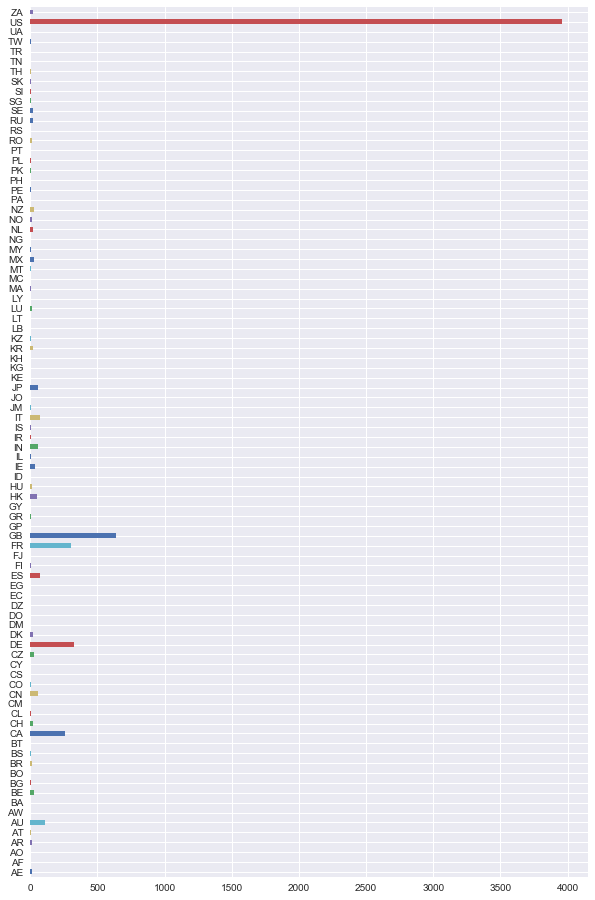

In [42]:
country_df = pd.Series(country_strings).str.get_dummies(' ')
sns.set()
country_df.sum().plot.barh(figsize=(10, 16))

In [43]:
data2.drop(['production_countries'], axis=1, inplace=True)

In [44]:
data2

,budget,popularity,revenue,runtime,vote_average,vote_count,has_website,release_year
0,237000000,150.437577,2787965087,162.0,7.2,11800,1,2009.0
1,300000000,139.082615,961000000,169.0,6.9,4500,1,2007.0
2,245000000,107.376788,880674609,148.0,6.3,4466,1,2015.0
3,250000000,112.312950,1084939099,165.0,7.6,9106,1,2012.0
4,260000000,43.926995,284139100,132.0,6.1,2124,1,2012.0
5,258000000,115.699814,890871626,139.0,5.9,3576,1,2007.0
6,260000000,48.681969,591794936,100.0,7.4,3330,1,2010.0
7,280000000,134.279229,1405403694,141.0,7.3,6767,1,2015.0
8,250000000,98.885637,933959197,153.0,7.4,5293,1,2009.0
9,250000000,155.790452,873260194,151.0,5.7,7004,1,2016.0


### Добаване на encode-натите колони

След като даните ни вече изглеждат доста по-чистички, нека ги замърсим с encode-натите feature-и.




In [45]:
frames_list = [data2, genre_df, language_codes_df, statuses_df, country_df]
# pd.concat(frames_list, axis=1)
# след update на pandas от 0.20.3 до 0.21.0 този ред вече не точно се рънва. В по-старата версия
# целия DF се свеждаше до SparseDF, но за 0.21.0 са променили поведението.

Нека сведем всички SparseDataFrames до Dense ones.

In [46]:
print([type(frame) for frame in frames_list])

language_codes_df = language_codes_df.to_dense()
statuses_df = statuses_df.to_dense()
frames_list = [data2, genre_df, language_codes_df, statuses_df, country_df]

print([type(frame) for frame in frames_list])

[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.sparse.frame.SparseDataFrame'>, <class 'pandas.core.sparse.frame.SparseDataFrame'>, <class 'pandas.core.frame.DataFrame'>]
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]


И нека сега ги съберем в един DF

In [47]:
data3 = pd.concat(frames_list, axis=1)
data3

,budget,popularity,revenue,runtime,vote_average,vote_count,has_website,release_year,10402,10749,...,SG,SI,SK,TH,TN,TR,TW,UA,US,ZA
0,237000000,150.437577,2787965087,162.0,7.2,11800,1,2009.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,300000000,139.082615,961000000,169.0,6.9,4500,1,2007.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,245000000,107.376788,880674609,148.0,6.3,4466,1,2015.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,250000000,112.312950,1084939099,165.0,7.6,9106,1,2012.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,260000000,43.926995,284139100,132.0,6.1,2124,1,2012.0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,258000000,115.699814,890871626,139.0,5.9,3576,1,2007.0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,260000000,48.681969,591794936,100.0,7.4,3330,1,2010.0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,280000000,134.279229,1405403694,141.0,7.3,6767,1,2015.0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,250000000,98.885637,933959197,153.0,7.4,5293,1,2009.0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,250000000,155.790452,873260194,151.0,5.7,7004,1,2016.0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Проверка на данните за `revenue`

След като ще се опитваме да отгатваме revenue, ще е хубаво да проверим каква част от данните изобщо имат тази стойност

In [48]:
len(np.nonzero(data2['revenue'])[0])

3376

Надявах се да са повече, но мисля, че и това ще стигне.

In [49]:
data3 = data3.loc[data3['revenue'] != 0]

Бихме могли да покажем зависимостта между budget и revenue със следната графика

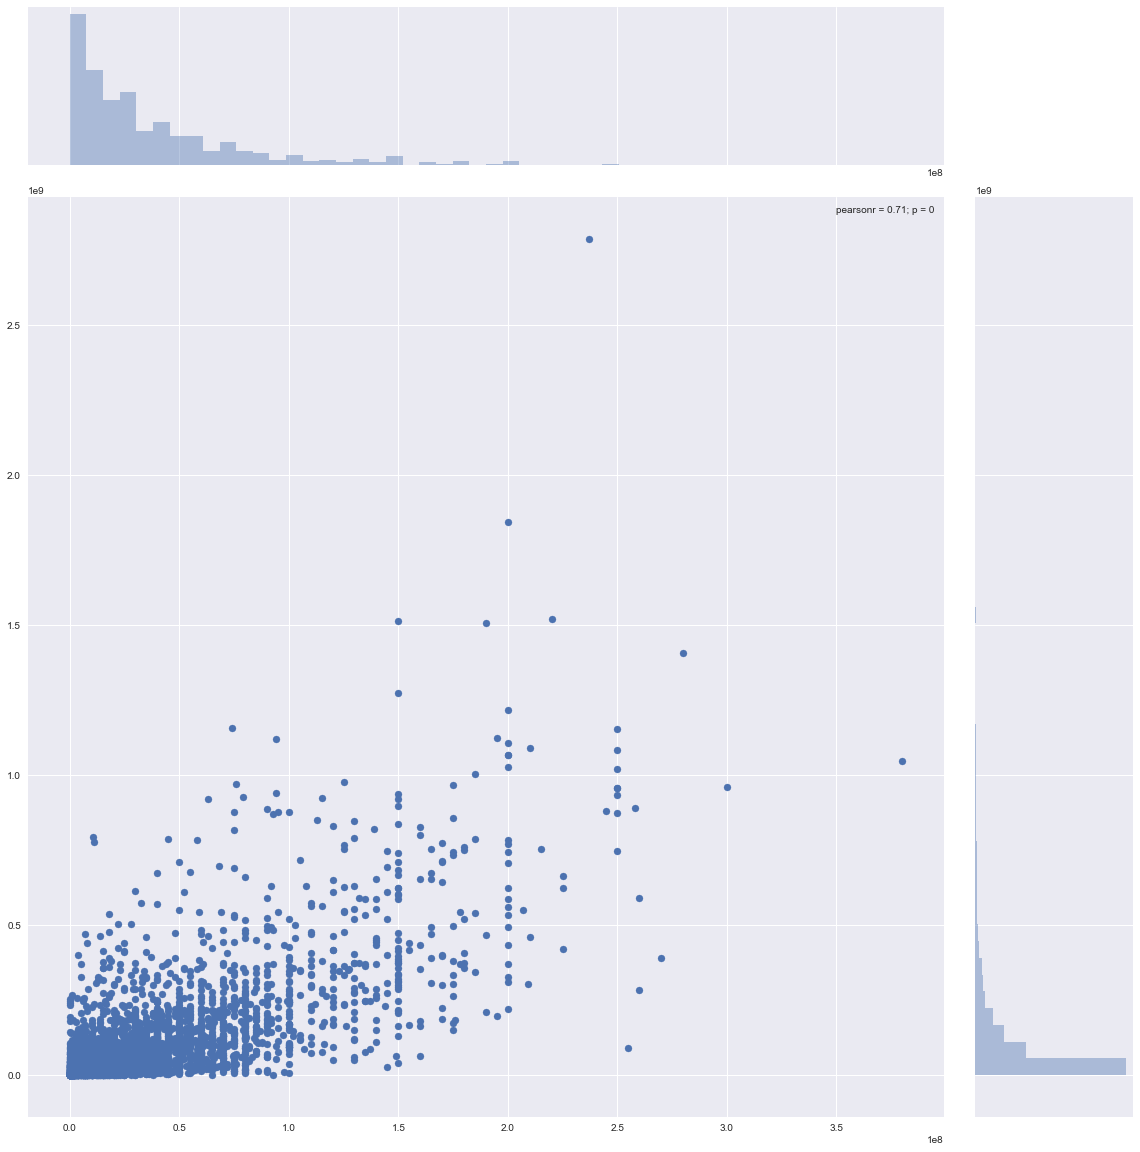

In [50]:
budget = data3['budget'].values.reshape(-1, 1)
revenue = data3['revenue'].values.reshape(-1, 1)
sns.jointplot(x=budget, y=revenue, size=16)

От няколкото outliers можем да видим, че огромния бюджет, не винаги гарантира огромни печалби и че по-голямата част от продукциите не са с бюджети по-големи от 100 mil.

И с това завършихме data exploration-а на данните които имахме. Сега ще започнем същинската част, а именно тренирането на модели.

## 2. Training

Нека разделим данните на train и test set-ове

In [51]:
from sklearn.model_selection import train_test_split

X = data3.drop(['revenue'], axis=1)
y = data3['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Линейна регресия


Нека като baseline да използваме една линейна регресия.

In [52]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
train_score1 = linear_regression.score(X_train, y_train)
test_score1 = linear_regression.score(X_test, y_test)
print("Train score: ", train_score1)
print("Test score: ", test_score1)

Train score:  0.732383326395
Test score:  0.69821630827


Не е толкова зле, но винаги може по-добре. Какво ще се случи ако дадем на модела да нормализира сам данните? Нека проверим

In [53]:
linear_regression_with_normalization = LinearRegression(normalize=True)
linear_regression_with_normalization.fit(X_train,y_train)
print("Train score: ", linear_regression_with_normalization.score(X_train, y_train))
print("Test score: ", linear_regression_with_normalization.score(X_test, y_test))

Train score:  0.72814741563
Test score:  -4.87873646854e+27


Well, това беше неочквано. Не съм сигурен как разликата в test score-овете стана толкова голяма. Нека за сега продължим да ползваме ненормализираната регресия.

Нека направим барплот на теглата на колоните. Очакваме бюджета и популярността да са със сравнително малко тегло (тъй като имаме бюджети в стотици милиони и binary encoded стойности за държавите), но също така с голямо тегло сигурно ще бъде и това дали филма е американски.

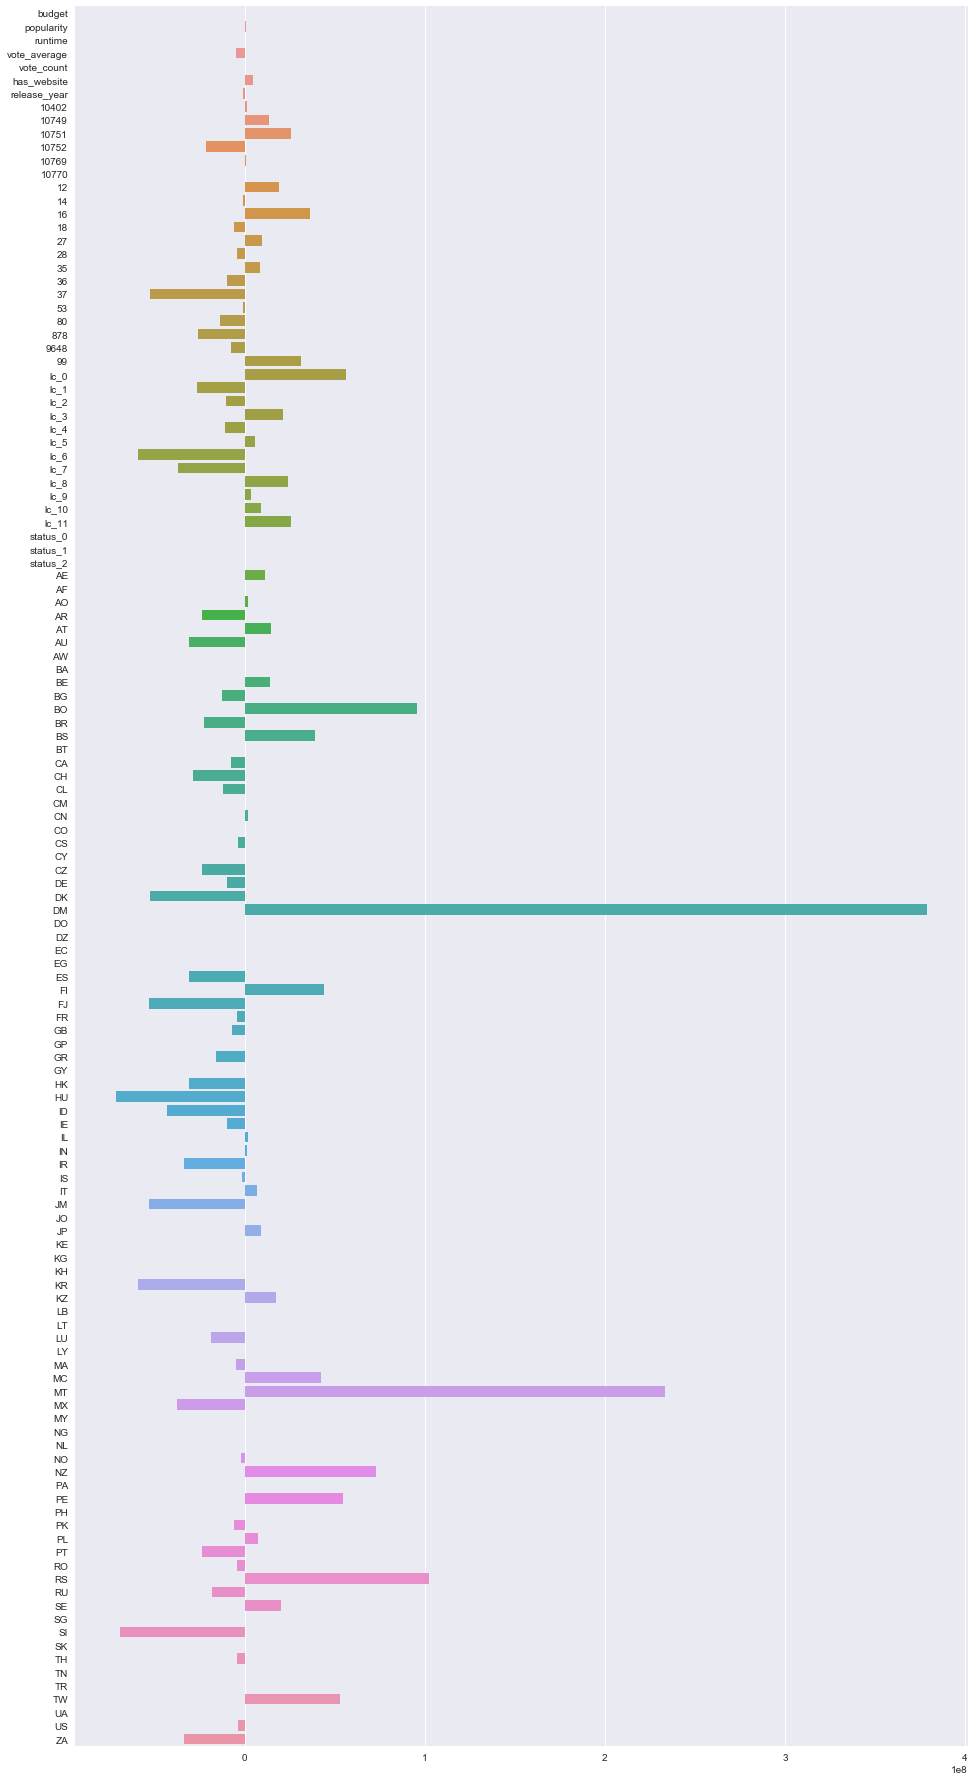

In [54]:
plt.subplots(figsize=(16, 32))
sns.barplot(y = X_train.describe().columns, x = linear_regression.coef_, orient='h')

Високите тегла на Доминика и Малта сигурно се дължат на това, че 'участват' в малко, но много печеливши филми, а отрицателното на US, че много филми, независимо дали печеливши или не, се снимат с участието на студия от САЩ. Интересно ми е дали информацията за държавите не внася само шум към данните и мисля да се пробвам да тренирам още една линейна регресия без тях.

In [55]:
frames_list = [data2, genre_df, language_codes_df, statuses_df]

data4 = pd.concat(frames_list, axis=1)
data4 = data4.loc[data4['revenue'] != 0]

X2 = data4.drop(['revenue'], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42)

In [56]:
linear_reg_no_countries = LinearRegression()
linear_reg_no_countries.fit(X2_train, y2_train)
train_no_country_score = linear_reg_no_countries.score(X2_train, y2_train)
test_no_country_score = linear_reg_no_countries.score(X2_test, y2_test)
print("Train score: ", train_no_country_score)
print("Test score: ", test_no_country_score)

Train score:  0.724925594858
Test score:  0.704141124721


In [73]:
test_no_country_score - test_score1

0.0059248164502408995

Разликата е твърде малка, за да мога да го нарека подобрение.
Все пак вече имаме някакъв baseline score с който да сръвняваме дали подобряваме или не резултатите ни.

### Random Forest Regressor

Наскоро чух за това че има регресор по Random Forest и сега просто искам да видя какви резултати ще даде. Не съм чел почти нищо за него и едва ли ще направи много, но просто ми е интересно...

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators': [1, 5, 10, 30, 100],
        'max_depth': [10, 100, 1000],
        'min_samples_split': [2, 10 ,50, 100],
        'min_samples_leaf': [1, 5, 10, 20, 50, 100]}

search = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid=grid)
search.fit(X_test, y_test)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 30, 100], 'max_depth': [10, 100, 1000], 'min_samples_split': [2, 10, 50, 100], 'min_samples_leaf': [1, 5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
search.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 5}

In [60]:
pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
241,0.026017,0.001378,0.638307,0.926318,1000,1,2,5,"{'n_estimators': 5, 'max_depth': 1000, 'min_sa...",1,0.586994,0.901343,0.663266,0.938270,0.664844,0.939341,0.000207,0.000009,0.036354,0.017665
121,0.026107,0.001371,0.638307,0.926318,100,1,2,5,"{'n_estimators': 5, 'max_depth': 100, 'min_sam...",1,0.586994,0.901343,0.663266,0.938270,0.664844,0.939341,0.000482,0.000011,0.036354,0.017665
3,0.155336,0.004462,0.636174,0.949277,10,1,2,30,"{'n_estimators': 30, 'max_depth': 10, 'min_sam...",3,0.538427,0.952781,0.666901,0.954127,0.703543,0.940922,0.019906,0.001112,0.070837,0.005933
123,0.147254,0.003797,0.635128,0.953421,100,1,2,30,"{'n_estimators': 30, 'max_depth': 100, 'min_sa...",4,0.564126,0.953642,0.667438,0.958246,0.674073,0.948376,0.002115,0.000087,0.050368,0.004032
243,0.180654,0.005205,0.635128,0.953421,1000,1,2,30,"{'n_estimators': 30, 'max_depth': 1000, 'min_s...",4,0.564126,0.953642,0.667438,0.958246,0.674073,0.948376,0.012314,0.000556,0.050368,0.004032
244,0.606985,0.011801,0.632898,0.956103,1000,1,2,100,"{'n_estimators': 100, 'max_depth': 1000, 'min_...",6,0.558600,0.947525,0.661979,0.962667,0.678380,0.958115,0.035900,0.001389,0.053054,0.006343
124,0.486348,0.010326,0.632898,0.956103,100,1,2,100,"{'n_estimators': 100, 'max_depth': 100, 'min_s...",6,0.558600,0.947525,0.661979,0.962667,0.678380,0.958115,0.004001,0.000089,0.053054,0.006343
1,0.027990,0.001597,0.626962,0.917116,10,1,2,5,"{'n_estimators': 5, 'max_depth': 10, 'min_samp...",8,0.680770,0.900975,0.646932,0.938297,0.552992,0.912075,0.000861,0.000019,0.054055,0.015648
242,0.050363,0.001882,0.620270,0.944894,1000,1,2,10,"{'n_estimators': 10, 'max_depth': 1000, 'min_s...",9,0.578439,0.943812,0.642355,0.944734,0.640166,0.946135,0.000558,0.000011,0.029645,0.000955
122,0.053871,0.002039,0.620270,0.944894,100,1,2,10,"{'n_estimators': 10, 'max_depth': 100, 'min_sa...",9,0.578439,0.943812,0.642355,0.944734,0.640166,0.946135,0.003250,0.000159,0.029645,0.000955


Можем да видим че, max_depth е хиперпараметър който е бил лимитиран от grid-а който сме дали, нека пуснем един по-fine -grained grid.

In [61]:
grid2 = {'n_estimators': [3, 5, 7],
         'max_depth': [5, 10, 25, 50, 100],
         'min_samples_split': [2, 3, 4, 5],
         'min_samples_leaf': [1]
        }

search = GridSearchCV(RandomForestRegressor(random_state = 42), param_grid=grid2)
search.fit(X_test, y_test)


pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,0.009287,0.001126,0.659252,0.876212,5,1,3,3,"{'n_estimators': 3, 'max_depth': 5, 'min_sampl...",1,0.635032,0.861345,0.663821,0.877566,0.678988,0.889725,0.000071,0.000070,0.018238,0.011625
7,0.014255,0.001248,0.656826,0.872484,5,1,4,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",2,0.653544,0.853928,0.666169,0.879939,0.650777,0.883587,0.000115,0.000019,0.006697,0.013206
4,0.014376,0.001251,0.655463,0.877930,5,1,3,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",3,0.644817,0.864743,0.674276,0.886940,0.647333,0.882107,0.000111,0.000018,0.013331,0.009531
9,0.009566,0.001185,0.647570,0.871185,5,1,5,3,"{'n_estimators': 3, 'max_depth': 5, 'min_sampl...",4,0.625521,0.848302,0.636566,0.876268,0.680700,0.888985,0.000256,0.000068,0.023836,0.016994
10,0.016206,0.001504,0.645276,0.871552,5,1,5,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",5,0.651746,0.849211,0.644684,0.884176,0.639376,0.881268,0.000316,0.000159,0.005069,0.015842
12,0.014673,0.001284,0.640654,0.922956,10,1,2,3,"{'n_estimators': 3, 'max_depth': 10, 'min_samp...",6,0.668374,0.911612,0.629442,0.925961,0.624047,0.931294,0.000058,0.000024,0.019759,0.008311
1,0.016948,0.001578,0.639590,0.875841,5,1,2,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",7,0.624316,0.858855,0.665071,0.888340,0.629437,0.880328,0.000840,0.000221,0.018123,0.012448
49,0.026073,0.001384,0.638307,0.926318,100,1,2,5,"{'n_estimators': 5, 'max_depth': 100, 'min_sam...",8,0.586994,0.901343,0.663266,0.938270,0.664844,0.939341,0.000408,0.000021,0.036354,0.017665
37,0.028656,0.001568,0.638307,0.926318,50,1,2,5,"{'n_estimators': 5, 'max_depth': 50, 'min_samp...",8,0.586994,0.901343,0.663266,0.938270,0.664844,0.939341,0.000627,0.000015,0.036354,0.017665
25,0.027383,0.001390,0.638307,0.926318,25,1,2,5,"{'n_estimators': 5, 'max_depth': 25, 'min_samp...",8,0.586994,0.901343,0.663266,0.938270,0.664844,0.939341,0.001049,0.000039,0.036354,0.017665


_Third time is the charm_

In [62]:
grid3 = {'n_estimators': [2, 3, 4, 5],
         'max_depth': [1, 2, 3 ,4, 5],
         'min_samples_split': [2, 3, 4, 5],
         'min_samples_leaf': [1]}

search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=grid3)
search.fit(X_test, y_test)


pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
69,0.009387,0.001088,0.659252,0.876212,5,1,3,3,"{'n_estimators': 3, 'max_depth': 5, 'min_sampl...",1,0.635032,0.861345,0.663821,0.877566,0.678988,0.889725,1.805094e-04,0.000014,0.018238,0.011625
75,0.014282,0.001253,0.656826,0.872484,5,1,4,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",2,0.653544,0.853928,0.666169,0.879939,0.650777,0.883587,1.234203e-04,0.000014,0.006697,0.013206
71,0.015916,0.001367,0.655463,0.877930,5,1,3,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",3,0.644817,0.864743,0.674276,0.886940,0.647333,0.882107,2.140665e-03,0.000076,0.013331,0.009531
74,0.012048,0.001197,0.650074,0.878422,5,1,4,4,"{'n_estimators': 4, 'max_depth': 5, 'min_sampl...",4,0.643773,0.856364,0.644062,0.879576,0.662409,0.899326,6.904056e-05,0.000005,0.008715,0.017558
70,0.011735,0.001192,0.648718,0.884776,5,1,3,4,"{'n_estimators': 4, 'max_depth': 5, 'min_sampl...",5,0.631902,0.869419,0.655067,0.887578,0.659244,0.897332,4.208356e-05,0.000030,0.012033,0.011567
77,0.009314,0.001124,0.647570,0.871185,5,1,5,3,"{'n_estimators': 3, 'max_depth': 5, 'min_sampl...",6,0.625521,0.848302,0.636566,0.876268,0.680700,0.888985,4.870681e-05,0.000045,0.023836,0.016994
79,0.014307,0.001240,0.645276,0.871552,5,1,5,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",7,0.651746,0.849211,0.644684,0.884176,0.639376,0.881268,2.826115e-04,0.000012,0.005069,0.015842
49,0.009442,0.001339,0.643129,0.842492,4,1,2,3,"{'n_estimators': 3, 'max_depth': 4, 'min_sampl...",8,0.572162,0.850707,0.671163,0.830359,0.686315,0.846411,4.426623e-04,0.000161,0.050649,0.008757
67,0.014909,0.001291,0.639590,0.875841,5,1,2,5,"{'n_estimators': 5, 'max_depth': 5, 'min_sampl...",9,0.624316,0.858855,0.665071,0.888340,0.629437,0.880328,6.359953e-04,0.000032,0.018123,0.012448
78,0.012229,0.001222,0.638515,0.878023,5,1,5,4,"{'n_estimators': 4, 'max_depth': 5, 'min_sampl...",10,0.645746,0.852160,0.622114,0.884818,0.647658,0.897091,2.226917e-04,0.000004,0.011613,0.018962


In [63]:
rfr = search.best_estimator_
print("Unique values in the revenue column:", len(set(data3['revenue'])))

print("Unique values of predictions: ", len(set(rfr.predict(X_test))))

Unique values in the revenue column: 3296
Unique values of predictions:  141


Очаквах уникалните стойности на RFR да са по-малко, но едва ли ще успеем да достигнем резултат по-добър от този на линейния с него. Може би ще е добре да пробваме още един линеен модел преди да преминен на нелинейните.

### Ridge

In [64]:
from sklearn.linear_model import Ridge
grid = { 'alpha': [10**i for i in range(-2,3)] }

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_test, y_test)

pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
4,0.005907,0.000983,0.682377,0.740298,100,{'alpha': 100},1,0.610889,0.771947,0.708140,0.724202,0.728358,0.724744,0.000233,0.000023,0.051307,0.022381
3,0.008528,0.001008,0.679500,0.753020,10,{'alpha': 10},2,0.619190,0.779131,0.702651,0.742755,0.716874,0.737175,0.003840,0.000044,0.043114,0.018603
2,0.005858,0.000989,0.665437,0.759490,1,{'alpha': 1},3,0.621207,0.783371,0.696889,0.750324,0.678373,0.744776,0.000096,0.000012,0.032229,0.017038
1,0.005764,0.000989,0.650483,0.761407,0.1,{'alpha': 0.1},4,0.619371,0.784802,0.694924,0.752201,0.637265,0.747219,0.000031,0.000011,0.032236,0.016667
0,0.007201,0.000985,0.646025,0.761498,0.01,{'alpha': 0.01},5,0.618421,0.784863,0.694426,0.752294,0.625326,0.747339,0.002092,0.000017,0.034310,0.016645


Максимума е достигнат в гранична точка, нека бутнем още границата в правилната посока.

In [65]:
grid = { 'alpha': [10**i for i in range(2,7)] }

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_test, y_test)

pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005836,0.000985,0.682377,0.740298,100,{'alpha': 100},1,0.610889,0.771947,0.708140,0.724202,0.728358,0.724744,0.000137,0.000019,0.051307,0.022381
1,0.005777,0.000970,0.677148,0.727420,1000,{'alpha': 1000},2,0.604640,0.763501,0.707957,0.704772,0.719106,0.713988,0.000014,0.000010,0.051563,0.025789
2,0.005806,0.000969,0.675262,0.723842,10000,{'alpha': 10000},3,0.603504,0.760732,0.707160,0.699505,0.715377,0.711290,0.000071,0.000011,0.050941,0.026525
3,0.005756,0.000967,0.673222,0.722304,100000,{'alpha': 100000},4,0.599681,0.758639,0.705353,0.698168,0.714893,0.710104,0.000102,0.000011,0.052239,0.026151
4,0.005731,0.000973,0.667270,0.719041,1000000,{'alpha': 1000000},5,0.585195,0.754407,0.702635,0.696772,0.714273,0.705945,0.000029,0.000009,0.058333,0.025286


Значи златната alpha се крие някъде около 100

In [66]:
grid = { 'alpha': [25, 50, 100, 250, 500] }

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_test, y_test)

pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,0.012084,0.002688,0.683023,0.744951,50,{'alpha': 50},1,0.613705,0.774625,0.707206,0.731223,0.728405,0.729007,0.002158,0.001330,0.049858,0.021002
0,0.011488,0.005046,0.682415,0.748957,25,{'alpha': 25},2,0.616439,0.776861,0.705560,0.737129,0.725480,0.732882,0.004144,0.004690,0.047436,0.019807
2,0.128480,0.001090,0.682377,0.740298,100,{'alpha': 100},3,0.610889,0.771947,0.708140,0.724202,0.728358,0.724744,0.024769,0.000016,0.051307,0.022381
3,0.121304,0.001156,0.680358,0.734139,250,{'alpha': 250},4,0.607732,0.768158,0.708457,0.714859,0.725145,0.719399,0.022106,0.000081,0.051895,0.024127
4,0.083949,0.001270,0.678610,0.730254,500,{'alpha': 500},5,0.605924,0.765543,0.708266,0.709005,0.721897,0.716215,0.051322,0.000235,0.051787,0.025126


и последно

In [67]:
grid = { 'alpha': list(range(25,76)) }

search = GridSearchCV(Ridge(), param_grid=grid)
search.fit(X_test, y_test)

pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
23,0.005772,0.000962,0.683025,0.745209,48,{'alpha': 48},1,0.613874,0.774770,0.707128,0.731608,0.728320,0.729250,0.000091,1.296163e-06,0.049742,0.020925
24,0.005796,0.000967,0.683025,0.745079,49,{'alpha': 49},2,0.613788,0.774697,0.707168,0.731414,0.728365,0.729127,0.000090,6.702159e-06,0.049801,0.020963
22,0.005852,0.000970,0.683025,0.745341,47,{'alpha': 47},3,0.613960,0.774845,0.707087,0.731806,0.728272,0.729374,0.000106,9.959189e-06,0.049680,0.020885
25,0.005719,0.000968,0.683023,0.744951,50,{'alpha': 50},4,0.613705,0.774625,0.707206,0.731223,0.728405,0.729007,0.000020,2.849964e-06,0.049858,0.021002
21,0.005735,0.000968,0.683023,0.745476,46,{'alpha': 46},5,0.614049,0.774920,0.707045,0.732006,0.728220,0.729501,0.000028,5.947204e-07,0.049617,0.020845
26,0.005862,0.000983,0.683020,0.744825,51,{'alpha': 51},6,0.613623,0.774554,0.707242,0.731034,0.728443,0.728889,0.000106,2.019956e-05,0.049914,0.021039
20,0.006612,0.000981,0.683019,0.745612,45,{'alpha': 45},7,0.614139,0.774997,0.707001,0.732210,0.728163,0.729630,0.001027,1.246534e-05,0.049550,0.020805
27,0.011143,0.000988,0.683017,0.744701,52,{'alpha': 52},8,0.613543,0.774483,0.707278,0.730848,0.728478,0.728773,0.007707,2.608938e-05,0.049967,0.021076
19,0.005922,0.001028,0.683015,0.745751,44,{'alpha': 44},9,0.614231,0.775075,0.706955,0.732416,0.728103,0.729761,0.000179,8.419954e-05,0.049482,0.020763
28,0.005838,0.001076,0.683012,0.744579,53,{'alpha': 53},10,0.613464,0.774414,0.707312,0.730665,0.728509,0.728658,0.000136,1.545080e-04,0.050019,0.021112


Дори и с доста добре намерена alpha, отново не успяхме да достигнем score по-добър от този на baseline-а ни. Мисля, че е време да изкараме големите оръжия:

### Epsilon-Support Vector Regression

![the mask big guns](https://media2.giphy.com/media/skhAKQNwDSkjm/giphy.gif)

In [68]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
model.score(X_train, y_train)

-0.13097462077089017

Yikes, очаквах нещо лошо на данни където budget-а е в стотици милиони и имаме колони с 0 и 1, но не и чак толкова...
Нека минем данните през StandardScaler и да видим какво ще се случи тогава.

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), SVR())
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

-0.1309743405152346

Oхх... Вече хвърлям на посоки, но може би ако MinMaxScale-нем

In [70]:
from sklearn.preprocessing import MinMaxScaler

pipeline = make_pipeline(MinMaxScaler(), SVR())
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

-0.13097458788421457

Може би ако си поиграем с C и epsilon, на модела ..?

In [71]:
grid = {'svr__C': [10**i for i in range(-2, 6)], 'svr__epsilon': [10**i for i in range(-4, 4)]}


search = GridSearchCV(pipeline, param_grid=grid)
search.fit(X_test, y_test)

pd.DataFrame(search.cv_results_).sort_values('mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svr__C,param_svr__epsilon,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
63,0.066839,0.026550,-0.119223,-0.116332,100000,1000,"{'svr__epsilon': 1000, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.001691,0.000386,0.049243,0.008522
62,0.071695,0.028268,-0.119223,-0.116332,100000,100,"{'svr__epsilon': 100, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.005411,0.002404,0.049243,0.008522
61,0.066695,0.026391,-0.119223,-0.116332,100000,10,"{'svr__epsilon': 10, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.001192,0.000035,0.049243,0.008522
60,0.066062,0.028427,-0.119223,-0.116332,100000,1,"{'svr__epsilon': 1, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.000494,0.002792,0.049243,0.008522
59,0.066309,0.026415,-0.119223,-0.116332,100000,0.1,"{'svr__epsilon': 0.1, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.000817,0.000094,0.049243,0.008522
58,0.065671,0.026579,-0.119223,-0.116332,100000,0.01,"{'svr__epsilon': 0.01, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.000064,0.000190,0.049243,0.008522
57,0.067607,0.029291,-0.119223,-0.116332,100000,0.001,"{'svr__epsilon': 0.001, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.001880,0.004032,0.049243,0.008522
56,0.066890,0.026675,-0.119223,-0.116332,100000,0.0001,"{'svr__epsilon': 0.0001, 'svr__C': 100000}",1,-0.181915,-0.108030,-0.113842,-0.128050,-0.061690,-0.112917,0.001569,0.000452,0.049243,0.008522
52,0.066395,0.027370,-0.120166,-0.117210,10000,1,"{'svr__epsilon': 1, 'svr__C': 10000}",9,-0.183049,-0.108926,-0.114424,-0.128907,-0.062800,-0.113796,0.000514,0.000769,0.049273,0.008507
48,0.065547,0.026325,-0.120166,-0.117210,10000,0.0001,"{'svr__epsilon': 0.0001, 'svr__C': 10000}",9,-0.183049,-0.108926,-0.114424,-0.128907,-0.062800,-0.113796,0.000164,0.000056,0.049273,0.008507


По C имаме подобрение, но не е "особено добро". С по-големи C-та, времето което отнема на машината да сметне score-не е твърде голямо и няма смисъл да се опитваме да подобряваме резултата така.

In [74]:
from sklearn.svm import NuSVR

pipeline = make_pipeline(StandardScaler(), NuSVR())
pipeline.fit(X_train, y_train)
pipeline.score(X_train, y_train)

-0.049963581512185051

NuSVR се справя почти толкова добре колкото константен отговор ...

## Научено и заключения

Така стигнахме до момента в който не можах да подобря baseline-a ...
![crying pikachu](https://i2.wp.com/gifrific.com/wp-content/uploads/2012/06/Picachu-crying-pokemon.gif?ssl=1)


Най-вероятно някъде там се крие нещо което би помогнало, но би отнело доста време време да го намеря, а аз имам още 2 домашни за писане.

### Наученото:

1. Най-важно: По-големите оръжия не винаги водят до по-добри резултати (особено когато не знаеш как да ги използваш)
2. Проверявай за това кой редове имат валидна y стойност, преди да чистиш данните. Можеш да си спестиш малко работа (или поне процесорно време)
3. Sparse е лек за memory usage-а, но е отрова за нервите ти.
4. Разработката на pandas е активна и е добре да си на най-новата версия за да hit-ваш възможно най-малко подводни камъни